LOADING REQUIRED LIBRARIES

In [13]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LOADING THE DATASET

In [14]:
df = pd.read_csv(r'E:\Sentiment Analysis\Twitter_Data.csv')
df.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


PREPARE THE DATA

In [17]:
def clean_text(text):
    if not isinstance(text, str):
        return ''
    
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    
    text = text.lower()
    
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

df['clean_text'] = df['clean_text'].apply(clean_text)

df[['clean_text', 'category']].head()


,clean_text,category
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporters prefix chowkidar names modi ...,1.0
4,answer among powerful world leader today trump...,1.0


In [20]:
X = df['clean_text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


FEATURE EXTRACTION(TF-IDF)

In [21]:
tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

MODEL TRAINING(NAIVE BAYES)

In [23]:
print(y_train.isnull().sum())
print(y_test.isnull().sum())


7
0


In [24]:
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()

X_test = X_test[~y_test.isna()]
y_test = y_test.dropna()


In [31]:
X_train_clean = X_train[~y_train.isna()]
y_train_clean = y_train.dropna()

print(f'X_train_clean length: {len(X_train_clean)}')
print(f'y_train_clean length: {len(y_train_clean)}')

X_test_clean = X_test[~y_test.isna()]
y_test_clean = y_test.dropna()

print(f'X_test_clean length: {len(X_test_clean)}')
print(f'y_test_clean length: {len(y_test_clean)}')


X_train_clean length: 130377
y_train_clean length: 130377
X_test_clean length: 32596
y_test_clean length: 32596


In [32]:
tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train_clean)
X_test_tfidf = tfidf.transform(X_test_clean)


In [33]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train_clean)

y_pred = nb_model.predict(X_test_tfidf)


In [34]:
y_train = y_train.fillna('neutral')
y_test = y_test.fillna('neutral')


In [35]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred = nb_model.predict(X_test_tfidf)


In [36]:
X = df['clean_text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.73


In [42]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.89      0.44      0.58      7179
         0.0       0.84      0.66      0.74     11034
         1.0       0.66      0.93      0.77     14383

    accuracy                           0.73     32596
   macro avg       0.80      0.68      0.70     32596
weighted avg       0.77      0.73      0.72     32596



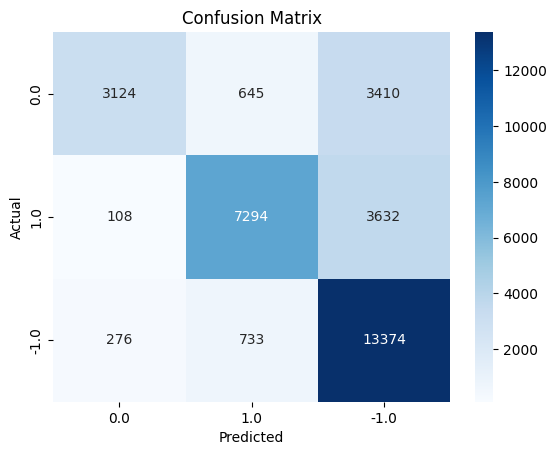

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)

class_labels = y_test.unique()

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
